
<div class="alert alert-bloc alert-info"> 
<b>Note:</b>  All examples use <b>canvas.display()</b> to show the results in a Jupyter notebook. If you are using it as a stand alone library, use <b>canvas.save("c:/temp/example.pdf")</b> to save the output as a pdf file. You can generate .pdf, .svg, .ps, .eps, .tex, and .png output.
</div>


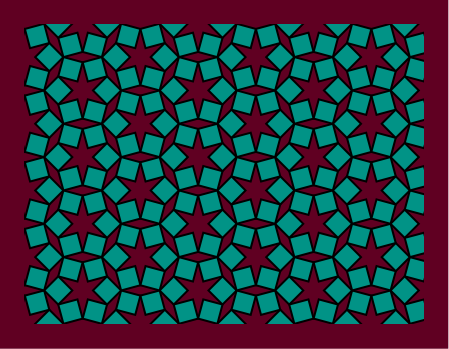

['Output written on c:/tmp\\file_uri_test.pdf (1 page).', 'Transcript written on c:/tmp\\file_uri_test.log.', '']


Canvas()

In [2]:
import simetri.graphics as sg
import simetri.wallpaper as wp

canvas = sg.Canvas(back_color = sg.burgundy)

d = 20
cd = sg.cos(sg.pi/4) * d
x = 2 * cd * sg.cos(sg.pi/6)
p1 = (x - cd, 0)
p2 = (x, cd)
p3 = (x + cd, 0)
dist = p3[0]
kernel = sg.Shape([p1, p2, p3])
petal = kernel.mirror(sg.axis_x, reps=1).merge_shapes()
star = petal.rotate(sg.pi/3, reps=5)
pattern = wp.cover_hex_flat(star, dist, reps1=3, reps2=4)
canvas.limits = (0, 0, 400, 300)
canvas.draw(pattern, fill_color=sg.colors.teal,
                                line_width=2, fill=True)

canvas.display()
canvas.save("c:/tmp/file_uri_test.pdf", overwrite=True)

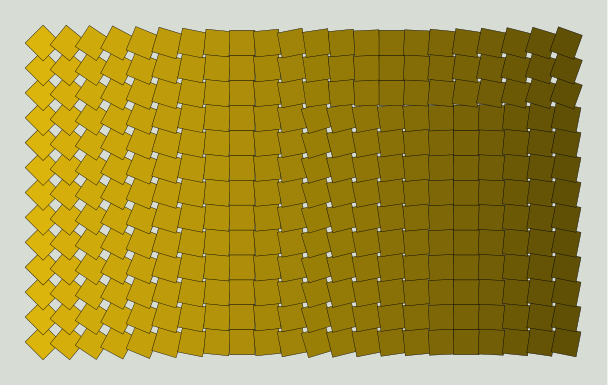

In [3]:
import simetri.graphics as sg

def rotator(element, modifier, mult=1):
    if modifier.count >= 140 and mult == -1:
        angle = -sg.pi/64
    else:
       angle = sg.pi/64
    element.rotate(angle, about=element.center)

def painter(element):
    element.fill_color = sg.change_lightness(element.fill_color, -.012)

canvas = sg.Canvas(back_color=sg.colors.light_gray)
sqr = sg.reg_poly_shape((0, 0), 4, 18)
sqr.fill_color = sg.colors.gold
batch = sg.Batch([sqr]).translate(0, 25, 12)
mod1 = sg.Modifier(rotator, life_span=140)
mod2 = sg.Modifier(rotator, mult=-1)
mod3 = sg.Modifier(painter)
batch.modifiers = [mod1, mod2, mod3]
batch.translate(dx=25, dy=0, reps=21)
canvas.draw(batch)

canvas.display()

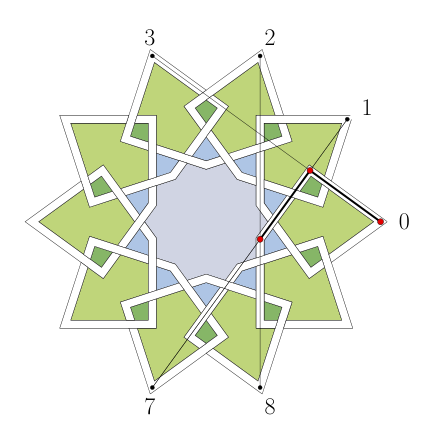

In [4]:
import simetri.graphics as sg

canvas = sg.Canvas()
grid = sg.CircularGrid(n=10, radius=175)

p1 = grid.intersect((1, 7), (2, 8))
p2 = grid.intersect((0, 3), (1, 7))
p3 = grid.points[0]

kernel = sg.Shape([p1, p2, p3])
petal = kernel.mirror(sg.axis_x, reps=1)
star = petal.rotate(sg.pi/5, reps=9)
swatch = sg.swatches_255[23]
lace = sg.Lace(star, offset=4, swatch = swatch)
canvas.draw(lace)

grid2 = sg.CircularGrid(n=10, radius=195)
for i in [0, 1, 2, 3, 7, 8]:
    canvas.text(str(i), grid2.points[i], font_size=24)
    canvas.circle(grid.points[i], radius=2)

for line in [(1, 7), (2, 8), (0, 3), (1, 7)]:
    start, end = grid.points[line[0]], grid.points[line[1]]
    canvas.line(start, end)

canvas.draw(sg.Shape([p1, p2, p3]), line_width=2)

for pnt in [p1, p2, p3]:
    canvas.circle(pnt, radius=3, fill_color=sg.red)

canvas.display()

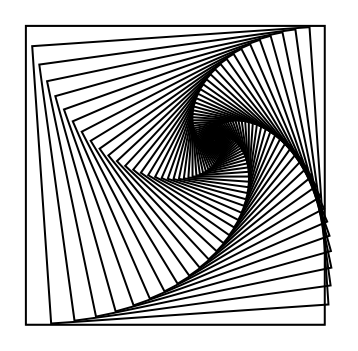

In [5]:
import simetri.graphics as sg

square = sg.Shape([(0, 0), (300, 0), (300, 300), (0, 300)],
                        closed=True, line_width=2, fill = False)
rot_angle = sg.pi / 46
scale_fac = 0.93
scale_mat = sg.scale_in_place_matrix(scale_fac, scale_fac, square.center)
trans_mat = sg.translation_matrix(5, 0)
rot_mat = sg.rotation_matrix(rot_angle, square.center)
transform_matrix = scale_mat @ rot_mat @ trans_mat
squares =   sg.Batch([square])
squares.transform(transform_matrix, reps=65)

canvas = sg.Canvas()
canvas.draw(squares)

canvas.display()

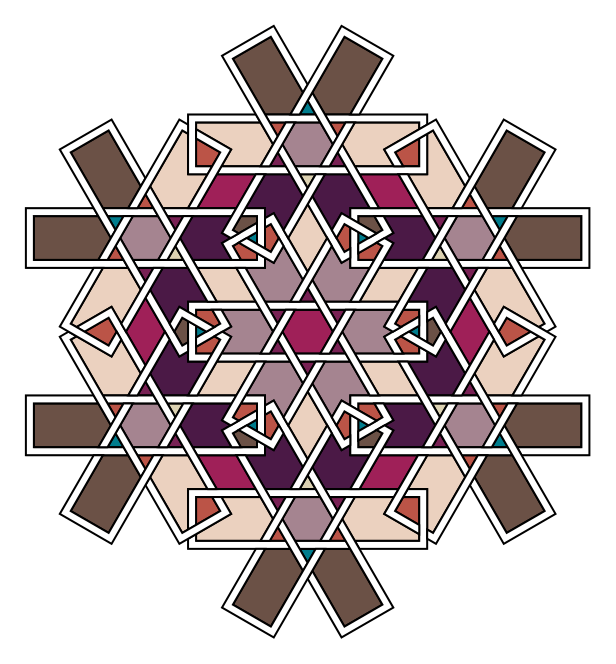

In [6]:
import simetri.graphics as sg

canvas = sg.Canvas()

c = 4 # scale multiplier
kernel = sg.Shape([(0, 6.5*c), (29*c, 6.5*c), (29*c, 0)])
petal = kernel.mirror(sg.axis_x, reps=1)
star = petal.rotate(sg.pi/3, reps=5)

canvas.draw(star)
star = star.merge_shapes()
dist = 47 * c
star2 = star.copy().translate(dist * sg.cos(sg.pi/6), dist * sg.sin(sg.pi/6))
star2.rotate(sg.pi/3, reps=5)
pattern = sg.Batch([star, star2])
lace = sg.Lace(pattern, offset=4)
lace.swatch =sg.colors.random_swatch()
canvas.draw(lace, line_width=2)

canvas.display()

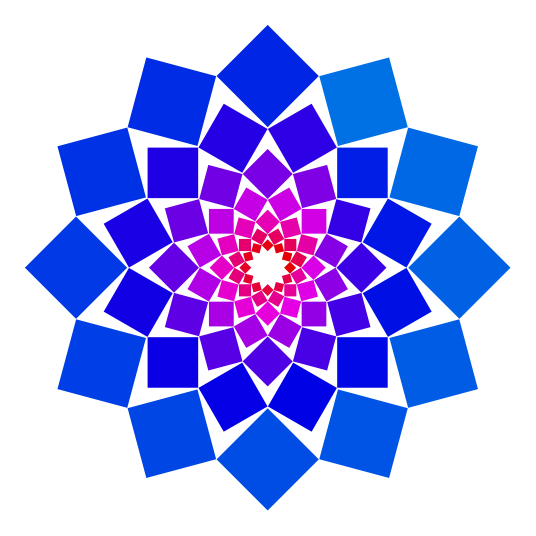

In [7]:
import simetri.graphics as sg

canvas = sg.Canvas()

w = 30
dx = 2.75 * w
sf_1 = 1.43 # scale factor 1
sf_2 = .2 # scale factor 2
square = sg.Shape([(0, 0), (w, w), (2 * w, 0), (w, -w)], closed=True)
squares = sg.Batch([square])
squares.translate(dx, 0).rotate(sg.pi/6, reps=11)
transform = sg.rotation_matrix(sg.pi/12) @ sg.scale_matrix(sf_1)
squares.transform(transform, reps=6).scale(sf_2, about=squares.center)
fill_color = sg.red
for square in squares:
    canvas.draw(square, fill_color = fill_color, stroke=False)
    fill_color = sg.change_hue(fill_color, -.005)

canvas.display()

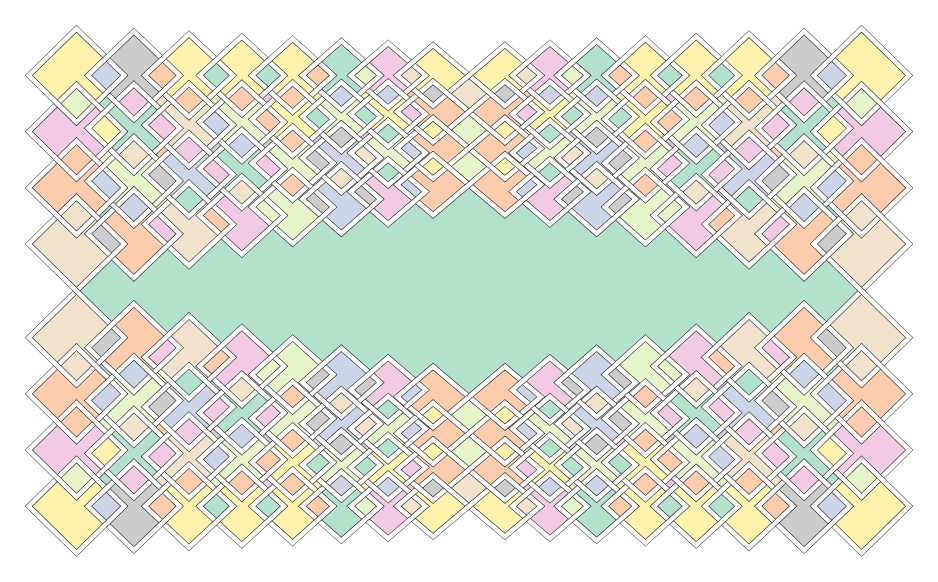

In [8]:
import simetri.graphics as sg

canvas = sg.Canvas()
square = sg.Batch([sg.reg_poly_shape(pos=(0, 0), n=4, r=100)])

batch = sg.Batch()
square.translate(0, 120, reps=3)
for i in range(8):
    square.translate(125, 0)
    square.scale(.96, .94)
    batch.extend([x.copy() for x in square.elements])

batch.mirror(batch.right, reps=1)
batch.mirror(batch.top, reps=1)

lace = sg.Lace(batch, offset=5)
lace.swatch = sg.qual_Pastel2_8
canvas.draw(lace.scale(.5))

canvas.display()

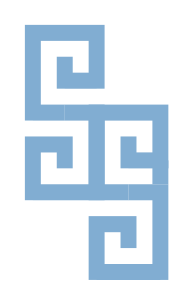

In [9]:
import simetri.graphics as sg

canvas = sg.Canvas()

w = 8
points  = [(0, 0), (-4, 0), (-4, 10), (4, 10),(4, 4), (0, 4), (0, 7)]
kernel = sg.Shape(points).scale(w)

logo = kernel.rotate(sg.pi, reps=1).translate(8*w, -10*w, reps=1)
logo.append(sg.Shape([[12, -6], [12, -9]]).scale(w))
fill_color = sg.Color(0.509, 0.678, 0.827)
canvas.draw(logo, line_width=2*w, line_color=fill_color)

canvas.display()

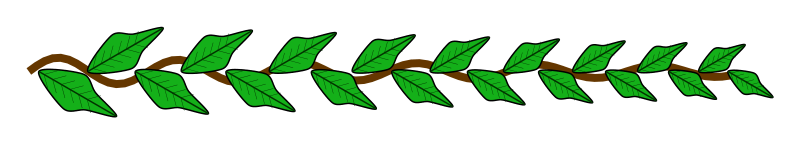

In [10]:
import simetri.graphics as sg

def scaler(element):
    return element.scale(.97)

mod1 = sg.Modifier(scaler)

canvas = sg.Canvas()
time, signal = sg.sine_wave(amplitude=12, frequency=1, duration=6, sample_rate=15, phase=0)
damping = sg.damping_function(amplitude=.6, duration=6, sample_rate=15)
damped_signal = sg.array(signal) * sg.array(damping)

points = list(zip([x*60 for x in time], damped_signal))
ivy = sg.Shape(points, line_color=sg.brown)
canvas.draw(ivy.scale(2), line_width=8)

leaf = sg.Shape([(0, 0), (20, 10), (30, 5), (45, 0)]).mirror(sg.axis_x, reps=1)
leaf = leaf.merge_shapes()
vein = sg.Shape([(0, 0), (45, 0)], line_color = sg.dark_green)
leaf.append(vein)
leaf.set_attribs('line_width', 1.5)
vein2 = sg.Shape([(3, 0), (8, 5)], line_color=sg.dark_green).mirror(sg.axis_x, reps=1)
vein2.translate(5, 0, reps=5)
leaf.append(vein2)
leaf = leaf.rotate(-sg.pi/6, leaf.west).scale(2).translate(10, 0)

leaf.modifiers = [mod1]
leaves = leaf.glide(glide_line=sg.axis_x, glide_dist=51, reps=18)

canvas.draw(leaves, smooth=True, fill_color=sg.green)

canvas.display()

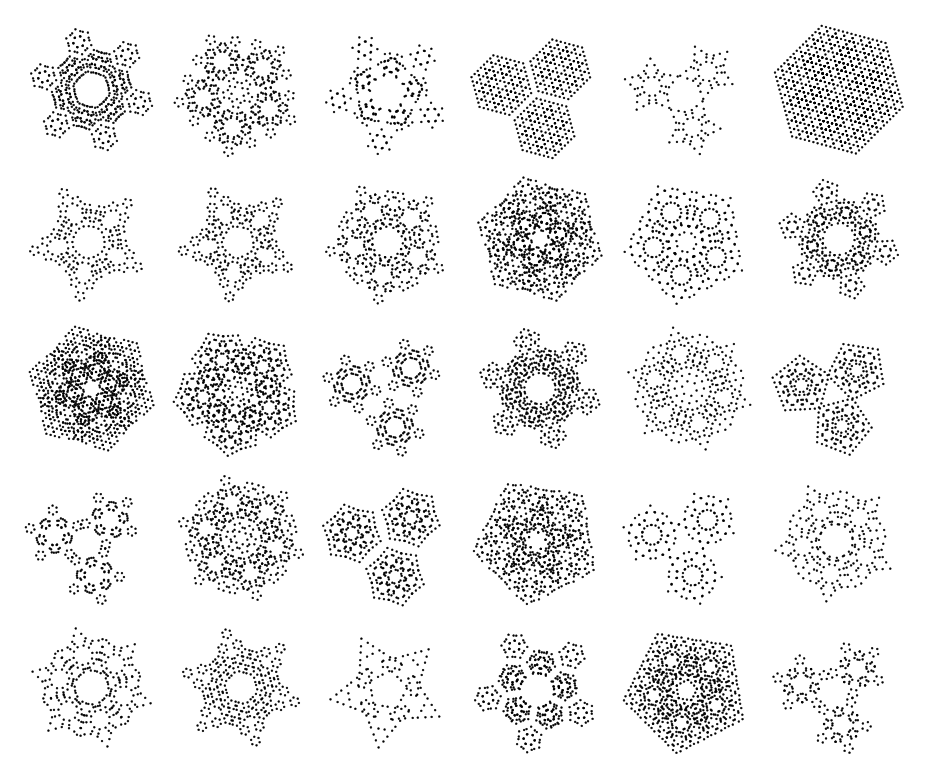

In [11]:
import simetri.graphics as sg
W, H, COLUMNS = 150, 150, 6
DX = DY = MARGIN = 50
canvas = sg.Canvas( )
ns = [3, 5, 6]
combinations = list(sg.product(ns, ns, ns, ns))
for i in range(30):
    row, col = i // COLUMNS, i % COLUMNS
    x, y = (col * W) + MARGIN, (row * H) + MARGIN
    dots = sg.Dots(marker_type=sg.MarkerType.FCIRCLE,
    marker_size=1)
    dots.translate(x+MARGIN, y+MARGIN)
    combination = sg.choice(combinations)
    combinations.remove(combination)
    for n in combination:
        dots.rotate(sg.two_pi/n, (x, y), reps=n-1)
        dots.scale(.5, about=dots.center)
        dots.translate(DX, DY)
    canvas.draw(dots)
canvas.display()

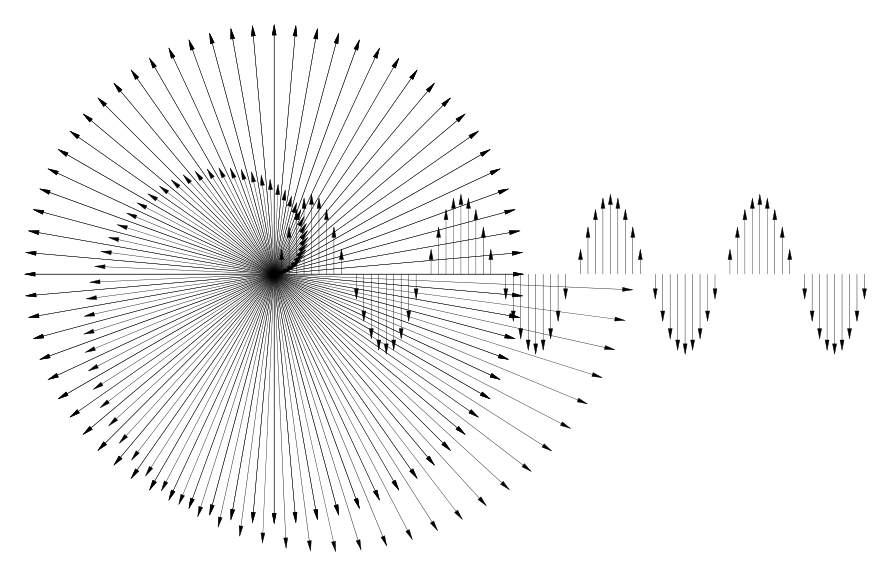

In [12]:
import simetri.graphics as sg

canvas = sg.Canvas()

def arrow(start, end, head_length=10, head_width=4, both_ends=False):
    length = sg.distance(start, end)
    if length <= head_length:
        return sg.Batch()

    shaft = sg.Shape([(0, 0), (length, 0)])
    x = length - head_length
    y = head_width/2
    p1 = x, y
    p2 = length, 0
    p3 = x, -y
    head = sg.Shape([p1, p2, p3], closed=True)

    if both_ends:
        p1_2 = head_length, y
        p2_2 = 0, 0
        p3_2 = head_length, -y
        head2 = sg.Shape([p1_2, p2_2, p3_2], closed=True)
        arrow_ = sg.Batch([shaft, head, head2])
    else:
        arrow_ = sg.Batch([shaft, head])

    angle = sg.line_angle(start, end)
    arrow_.rotate(angle)
    arrow_.translate(*start)

    return arrow_

start2 = (0, 0)
delta = sg.pi/36
for i in range(72):
    angle = i * delta
    start = sg.polar_to_cartesian(250, angle)
    end = sg.polar_to_cartesian(250, sg.pi + angle)
    canvas.draw(arrow(start, end, both_ends=True))
    end2 = sg.polar_to_cartesian((i+1)*5, angle + delta/2)
    canvas.draw(arrow(start2, end2))

time, signal = sg.sine_wave(amplitude=80, frequency=1, duration=4, sample_rate=20, phase=0)
points = list(zip([x*150 for x in time], signal))
for i, p in enumerate(points):
    if i == 20:
        canvas.draw(arrow((p[0], 0), p), fill_color= sg.yellow)
    else:
        canvas.draw(arrow((p[0], 0), p))

canvas.display()

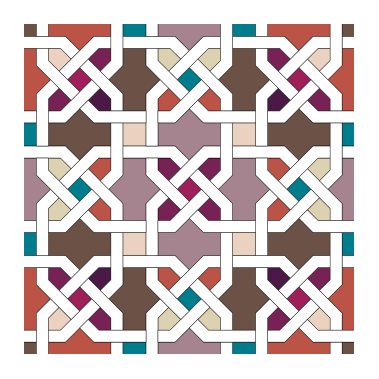

In [13]:
import simetri.graphics as sg

canvas = sg.Canvas()
canvas.limits = (0, 0, 330, 330)
dist = 110
octagon = sg.reg_poly_shape((0, 0), 8, 100).rotate(sg.pi/8)
pattern = octagon.translate(0, dist, reps=3)
pattern.translate(dist, 0, reps=3)
lace = sg.Lace(pattern, offset=6, swatch=sg.random_swatch())
canvas.draw(lace)
canvas.display()

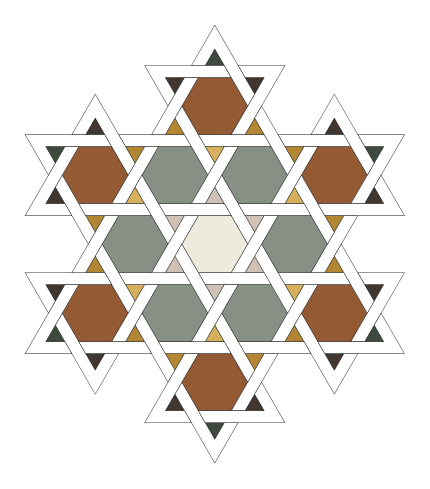

In [18]:
import simetri.graphics as sg

canvas = sg.Canvas()

w = 40
p1, p2 = sg.tri_to_cart([(w, w), (w, -2*w)])
points  = [p1, p2]
kernel = sg.Shape(points)
star = kernel.rotate(sg.pi/3, reps=5).rotate(sg.pi/6)
star2 = star.copy().translate(4 * sg.cos(sg.pi/6) * w, 0)
star2.rotate(sg.pi/3, reps=5)
swatch = sg.colors.random_swatch()
lace = sg.Lace(sg.Batch([star, star2]), offset=6, swatch=swatch)
canvas.draw(lace.rotate(sg.pi/6))
canvas.display()

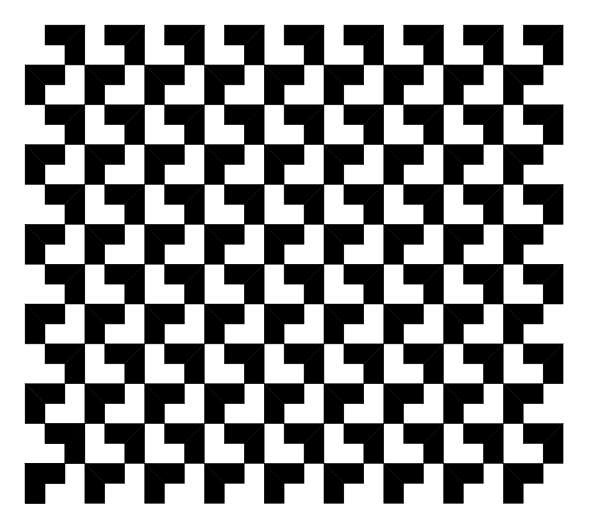

In [15]:
import simetri.graphics as sg

canvas = sg.Canvas()
w = 20
points  = [(0, 0), (0, 2*w), (1*w, 1*w), (1*w, 0)]
shape1 = sg.Shape(points,closed=True)
shape1 = shape1.mirror((shape1[1], shape1[2]), reps=1)
canvas.draw(shape1)
shape2 = shape1.copy().mirror(shape1.right).translate(-w, 2*w)
canvas.draw(shape2, fill_color=sg.gray)
kernel = sg.Batch([shape1, shape2])
kernel.translate(3*w, 0, reps=8).translate(0, 4*w, reps=5)
canvas.draw(kernel)
canvas.display()

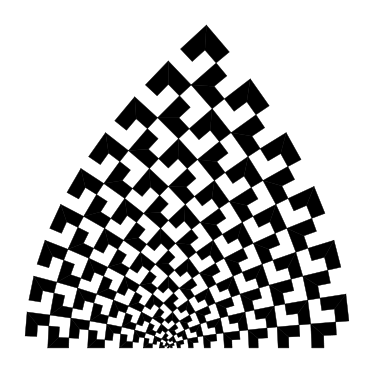

In [16]:
import numpy as np

import simetri.graphics as sg

canvas = sg.Canvas()
w = .5
points  = [(0, 0), (0, 2*w), (1*w, 1*w), (1*w, 0)]
shape1 = sg.Shape(points,closed=True)
shape1 = shape1.mirror((shape1[1], shape1[2]), reps=1)
canvas.draw(shape1)
shape2 = shape1.copy().mirror(shape1.right).translate(-w, 2*w)
canvas.draw(shape2, fill_color=sg.gray)
pattern = sg.Batch([shape1, shape2])
pattern.translate(3*w, 0, reps=8).translate(0, 4*w, reps=5)
def transform(batch, func):
    '''Vectorize the function and apply it to the coordinates
    of the segments in the batch'''
    vec_func = np.vectorize(func)
    shapes = []
    for segment in batch.all_shapes:
        coords = segment.final_coords
        x, y = vec_func(coords[:, 0], coords[:, 1])
        result = np.column_stack((x, y))
        shapes.append(sg.Shape([(x, y) for x, y in result[:, :2]], closed=True))
    return sg.Batch(shapes)

def transform_func(x, y):
    '''z -> z**2'''
    a = complex(x, y)
    res = a**2
    return (res.real, res.imag)
    # return (x**2 - y**2, 2*x*y)

transformed = transform(pattern, transform_func)

canvas.draw(transformed)
canvas.display()

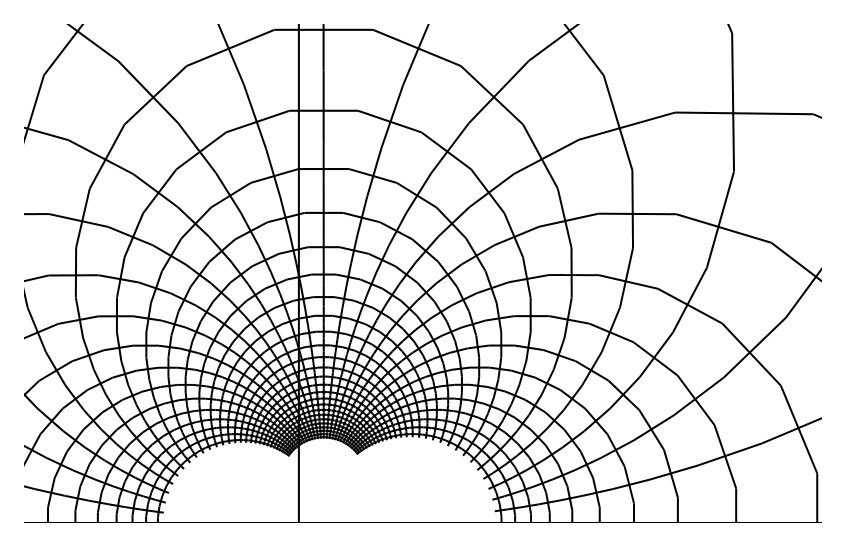

In [17]:
import simetri.graphics as sg

canvas = sg.Canvas()

seg = sg.Shape([(0, 0), (2, 0)])
segments = seg.translate(2, 0, reps=29)
segments.translate(0, 2, reps=29)
segments.rotate(sg.pi/2, segments.center, reps=1)
segments.translate(-30, 0)
canvas.draw(segments)

def transform(batch, func):
    '''Vectorize the function and apply it to the coordinates
    of the segments in the batch'''
    vec_func = np.vectorize(func)
    shapes = []
    for segment in batch.all_shapes:
        coords = segment.final_coords
        x, y = vec_func(coords[:, 0], coords[:, 1])
        result = np.column_stack((x, y))
        shapes.append(sg.Shape([(x, y) for x, y in result[:, :2]], closed=True))
    return sg.Batch(shapes)

def transform_func(x, y):
    '''z -> z-1/z+1'''
    a = complex(x, y)
    res = (a - 1) / ( a + 1)
    return (res.real, res.imag)

transformed = transform(segments, transform_func)

canvas.draw(transformed.scale(2500), fill=False, line_width=2)
canvas.limits = (2200, 0, 3000, 500)
canvas.display()

In [34]:
import simetri.graphics as sg

sg.__version__

'0.0.5'